Evaluation Function: Euclidean + Manhattan
Optimal path - [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 9)]
Path cost: 10
Execution time: 0.000628 seconds


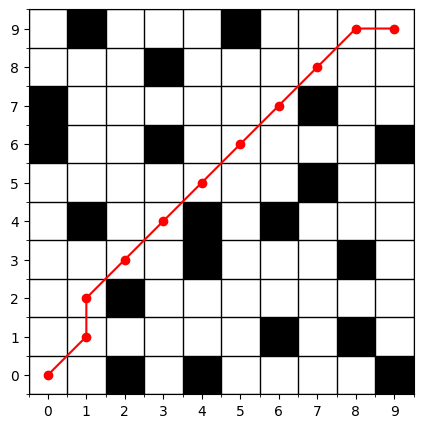

Evaluation Function: Euclidean + Diagonal
Optimal path - [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 9)]
Path cost: 10
Execution time: 0.001349 seconds


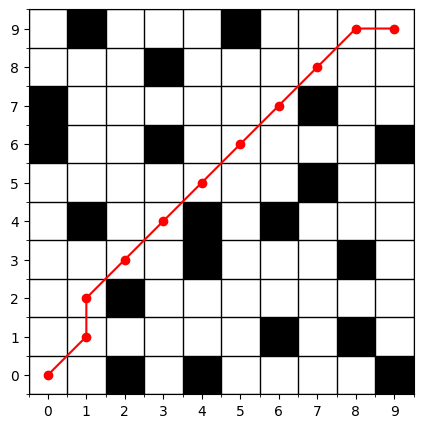

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import heapq, math, time

def euclidean_distance(current, goal):       # g(n)
    return math.sqrt((current[0] - goal[0])**2 + (current[1] - goal[1])**2)

def manhattan_distance(neighbor, goal):      # h(n)
    return abs(goal[0] - neighbor[0]) + abs(goal[1] - neighbor[1])

def diagonal_distance(neighbor, goal):       # h(n)
    dx = abs(neighbor[0] - goal[0])
    dy = abs(neighbor[1] - goal[1])
    return max(dx, dy)

def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path


def astar_search(grid, start, goal, heuristic):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {(i, j): float('inf') for i in range(len(grid)) for j in range(len(grid[0]))}
    g_score[start] = 0
    f_score = {(i, j): float('inf') for i in range(len(grid)) for j in range(len(grid[0]))}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, start, goal)

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip current cell
                neighbor_cell = (current[0] + dx, current[1] + dy)

                if 0 <= neighbor_cell[0] < len(grid[0]) and 0 <= neighbor_cell[1] < len(grid) and grid[neighbor_cell[1]][neighbor_cell[0]] != 1:
                    cost = euclidean_distance(current, goal)
                    tentative_g_score = g_score[current] + cost

                    if tentative_g_score < g_score[neighbor_cell]:
                        came_from[neighbor_cell] = current
                        g_score[neighbor_cell] = tentative_g_score
                        f_score[neighbor_cell] = tentative_g_score + heuristic(neighbor_cell, goal)    # f(n) = g(n) + h(n)
                        heapq.heappush(open_set, (f_score[neighbor_cell], neighbor_cell))

    return None

def read_input(file_name):
    with open(file_name, 'r') as file:
        m, n = map(int, file.readline().strip().split())
        grid = [[0 for _ in range(n)] for _ in range(m)]
        k = int(file.readline().strip())
        for _ in range(k):
            x, y = map(int, file.readline().strip().split())
            grid[y][x] = 1
        start = tuple(map(int, file.readline().strip().split()))
        goal = tuple(map(int, file.readline().strip().split()))
    return grid, start, goal


def visualize_grid(grid, path):
    plt.figure(figsize=(len(grid[0]) / 2, len(grid) / 2))

    grid_data = np.array(grid)

    plt.imshow(grid_data, cmap='Greys', interpolation='nearest', extent=[-0.5, len(grid) - 0.5, len(grid[0]) - 0.5, -0.5])  # Adjusted extent

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_x, path_y, marker='o', color='red')

    plt.xticks(np.arange(0, len(grid), 1))
    plt.ylim(0,len(grid[0])-1)
    plt.yticks(np.arange(len(grid[0])-1, -1, -1))
    plt.gca().set_xticks(np.arange(-0.5, len(grid), 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
    plt.gca().xaxis.grid(True, which='minor', color='black', linestyle='-', linewidth=1)
    plt.gca().yaxis.grid(True, which='minor', color='black', linestyle='-', linewidth=1)

    plt.show()


def main():
    file_name = "/content/ìnput.txt"
    grid, start, goal = read_input(file_name)

    heuristics = {
        "Euclidean + Manhattan": manhattan_distance,
        "Euclidean + Diagonal": diagonal_distance
    }

    for heuristic_name, heuristic_func in heuristics.items():
        start_time = time.time()
        path = astar_search(grid, start, goal, heuristic_func)
        end_time = time.time()
        if path:
          print(f"Evaluation Function: {heuristic_name}")
          print('Optimal path -',path)
          print("Path cost:", len(path)-1)
          print(f"Execution time: {end_time - start_time:.6f} seconds")
          visualize_grid(grid, path)
        else:
          print(f"No path found using {heuristic_name}.")

if __name__ == "__main__":
    main()